In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Nombre del archivo
ruta="/content/amplificador.dat"

# Importar los datos como un DataFrame
datos = pd.read_csv(ruta, sep='\s+', header=None, skiprows=1)


In [ ]:
datos.head()

,0
0,7521.2
1,7556.1
2,7478.0
3,7495.1
4,7487.3


In [ ]:
datos.describe()

,0
count,200.000000
mean,7501.800000
std,26.810389
min,7441.300000
25%,7488.175000
50%,7502.200000
75%,7512.950000
max,7559.700000


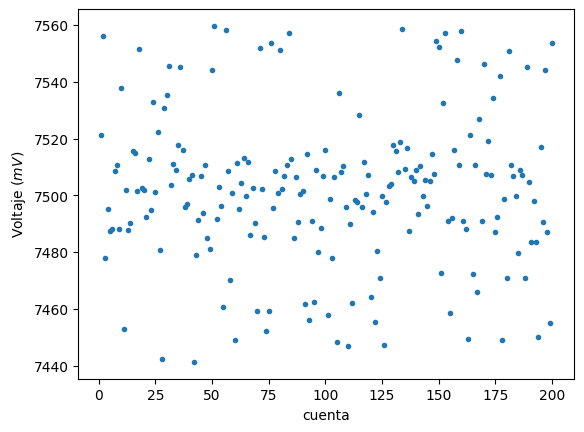

In [ ]:
x=list(range(1,201))
plt.plot(x,datos,'.')
plt.xlabel("cuenta")
plt.ylabel("Voltaje $(mV)$")

plt.show()

In [ ]:
np.int32(datos[0].max()-datos[0].min())

118

In [ ]:
def grafica(tamano,N):
  cantidad=int((datos[0].max()-datos[0].min())/tamano)
  plt.hist(datos, bins=cantidad, edgecolor='blue', histtype='step', linewidth=1.1, label=f'tamaño del canal={tamano}')
  plt.xlabel(r'Voltaje $(mV)$')
  plt.legend()
  plt.ylabel('Frecuencia')
  plt.title(f'Histograma {N}')
  plt.grid(True)
  plt.show()
  print("Cada bin mide " +str(tamano) , " , el número de bins son: ", (cantidad))


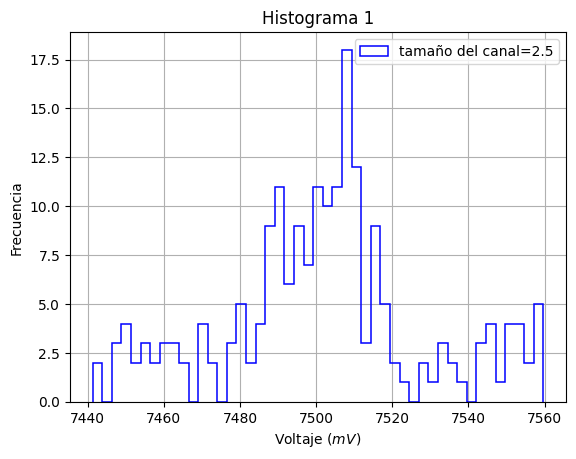

Cada bin mide 2.5  , el número de bins son:  47


In [ ]:
grafica(2.5,1)

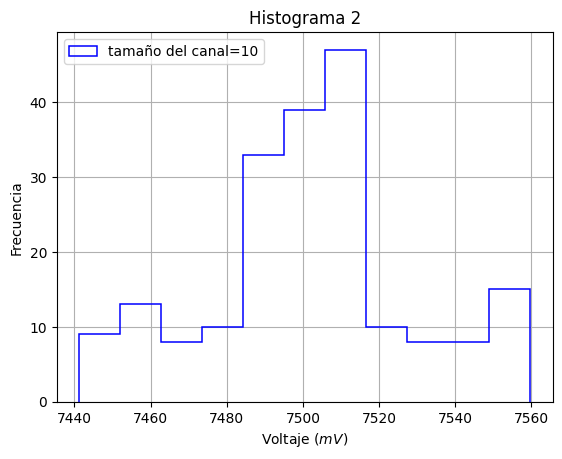

Cada bin mide 10  , el número de bins son:  11


In [ ]:
grafica(10,2)

In [ ]:
mu=0
for valor in datos[0]:
    mu += valor

mu=mu/len(datos[0])
print(mu)

7501.8


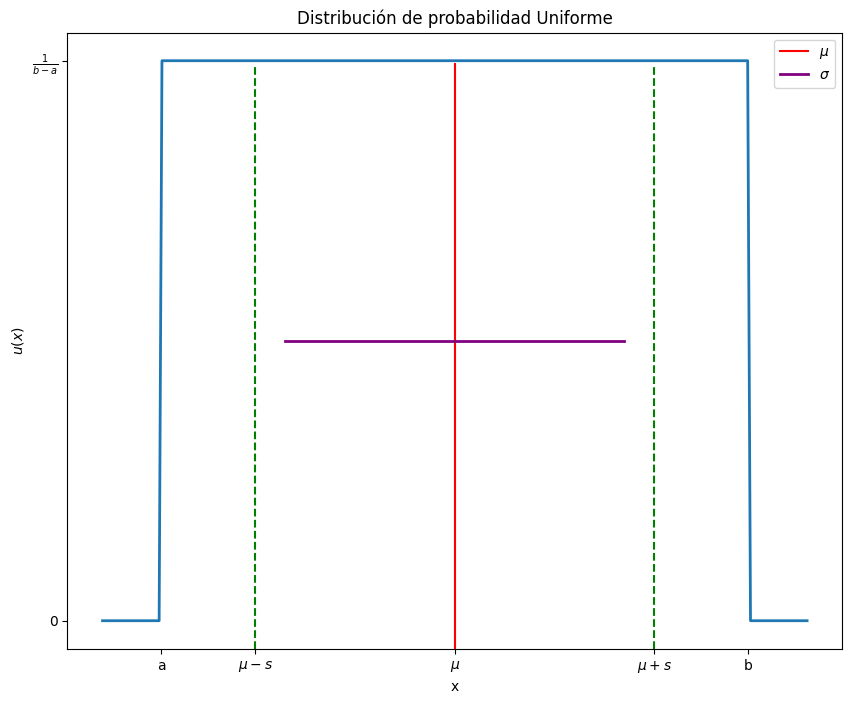

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Definir los límites de la distribución uniforme
a = 0
b = 10
mu=(a+b)/2
sigma=(b-a)/(np.sqrt(12))
s=0.34*(b-a)
# Definir la función a trozos para la distribución uniforme
def distribucion_uniforme(x, a, b):
    return np.where((x >= a) & (x <= b),( 1 / (b - a)), 0)

# Crear un array de valores x uniformemente espaciados
x = np.linspace(a - 1, b + 1, 250)  # Añadimos un pequeño margen en los extremos para la visualización

# Evaluar la función en los valores de x
y = distribucion_uniforme(x, a, b)

i=mu-sigma
j=mu+sigma

def std(x, i, j):
    return np.where((x >= i) & (x <= j), 0.5 /(b - a), 0)

x1=np.linspace(i, j, 10)

y1 = std(x1,i,j)
# Crear la gráfica
plt.figure(figsize=(10, 8
                    ))

#grafica de u(x)
plt.plot(x, y, linewidth=2)
#limtes a y b

#plt.axvline(x=a, color='black', linestyle='-',  linewidth=1.5)
#plt.axvline(x=b, color='black', linestyle='-',  linewidth=1.5 )

#media
plt.axvline(x=mu, ymax= 0.95, color='red', linestyle='-',linewidth=1.5, label='$\mu$')
#std
plt.plot(x1, y1, linewidth=2, color='purple', label='$\sigma$')

#s para el 68 % de la probabilidad
plt.axvline(x=mu+s,ymin=0,ymax= 0.95, color='green', linestyle='--')
plt.axvline(x=mu-s,ymin=0, ymax= 0.95, color='green', linestyle='--')


plt.xlabel('x')
plt.ylabel('$u(x)$')
plt.title('Distribución de probabilidad Uniforme')
plt.xticks([a,mu-s,mu, mu+s, b], ['a','$\mu-s$','$\mu$', '$\mu+s$', 'b'])
plt.yticks([0, (1/(b-a))], ['0', '$\\frac{1}{b-a}$'])
plt.legend()
plt.show()
